In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
import scipy.interpolate
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Key function we examine:

$$
f(t, a, b, c) = \sqrt{a} \cdot e^{-b \cdot t} \cdot \sin(c \cdot t) + 0.5 \cdot \cos(2 \cdot t)
$$

Submit questions 3, 6, 11 and 13.


In [62]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series.png')
    plt.show()

def plot_against_interpolation(a, b, c, interpolated_values, t = np.linspace(0, 1, 100), title="Interpolated vs. true values"):
    f_values = f(t, a, b, c)
    # Plot values and interpolated function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.plot(t, interpolated_values, label='Interpolated', color='red', linestyle='dashed')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_two_functions(values1, values2, title="Interpolated vs True Values"):
    plt.figure(figsize=(10, 6))
    plt.plot(t, values1, label=r'$f(t; a, b, c)$', color='blue')
    plt.plot(t, values2, label='Interpolated', color='red', linestyle='dashed')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_ratio(f_values,interpolated_values, legend=True, cutoff=[-1,1], title="Ratio between true values and interpolated values"):
    ratio = f_values / interpolated_values
    plt.figure(figsize=(10, 6))
    # Cut off all values outside the cutoff range
    ratio = ratio[(ratio > cutoff[0]) & (ratio < cutoff[1])]
    plt.plot(ratio, label='Ratio of true values vs. interpolated values', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel("Ratio of true values vs. interpolated values")
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(True)
    plt.show()



# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

# Display the interactive plot
display(interactive_plot)



interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

## Question 1
Consider all parameter values (except t) are fixed and create an interpolator with respect to time (t). Use the original grid (100 t's between 0 and 1) for the interpolation.

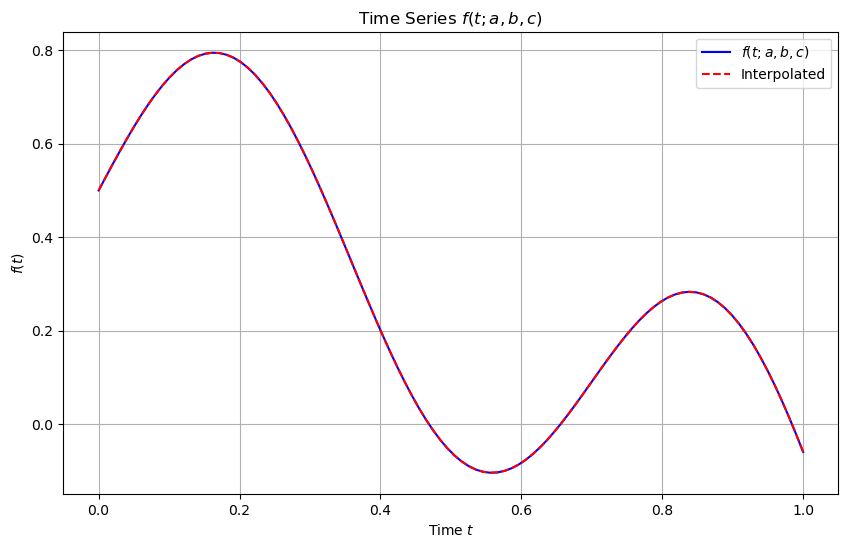

In [3]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 100)

# We obtain the values of f(t) for the given parameters
f_values = f(t, a, b, c)

# We interpolate the values of f(t) using a linear interpolation
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')

# We plot the values of f(t) and the interpolated function
plot_against_interpolation(a, b, c, f_interpolated(t), t=t)


### Conclusion
On an already fine grid, even with a linear interpolator, the function is already very well interpolated when examined visually.

## Question 2 and 3
Question 2 and 3 are closely related and are therefore jointly addressed.


2. Evaluate the interpolator on a much finer grid than the original t grid.
3. Show the results of question 2 in a plot, showing both the exact function and the predictions of the interpolator.

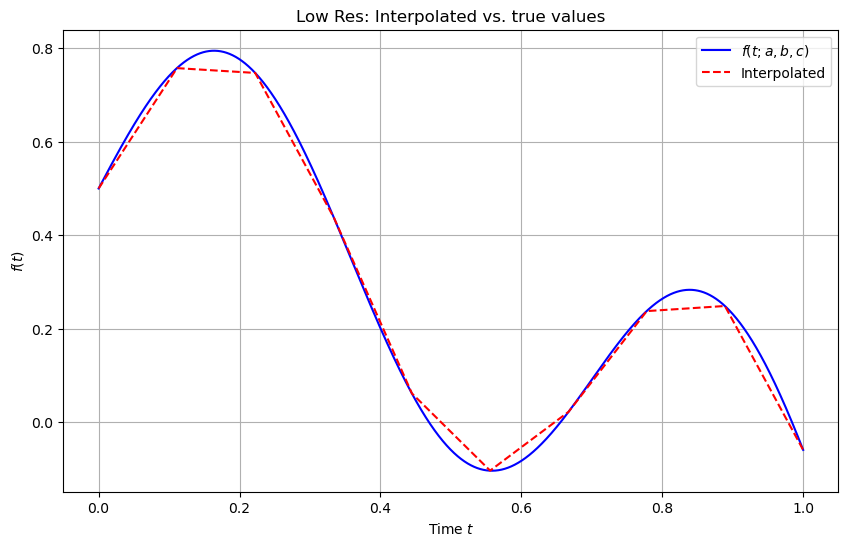

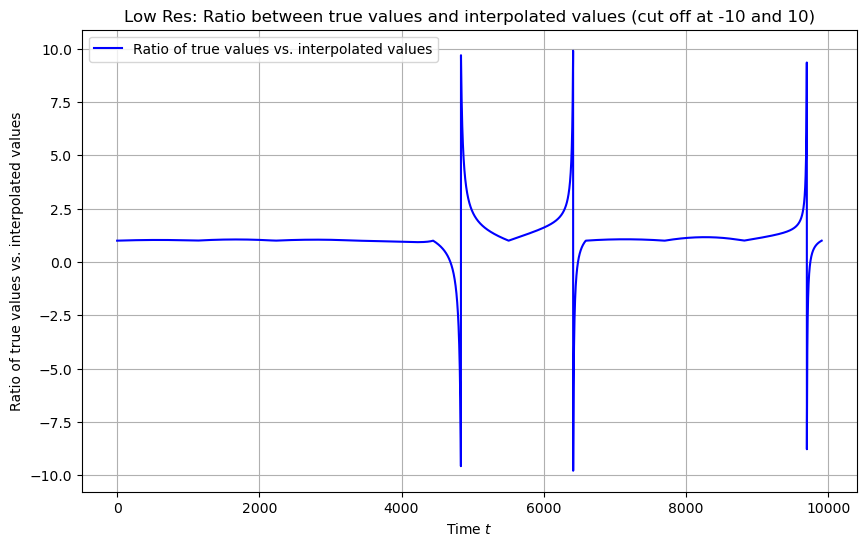

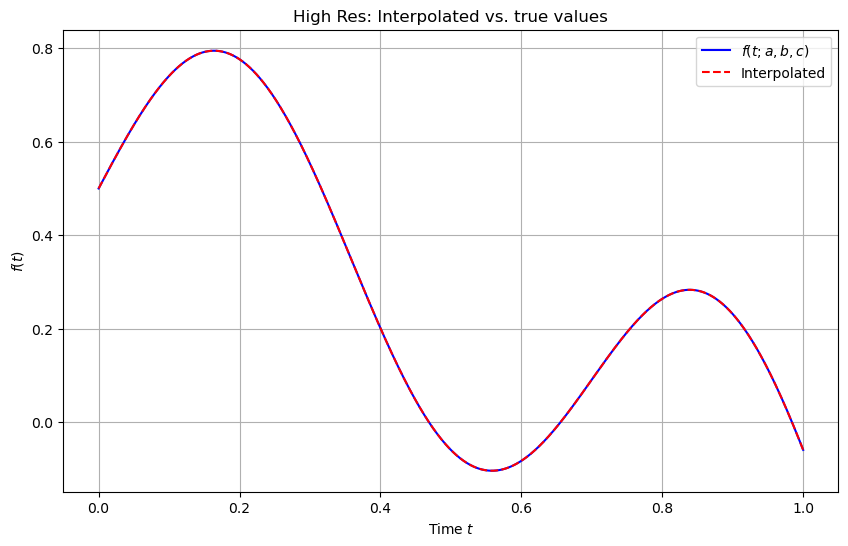

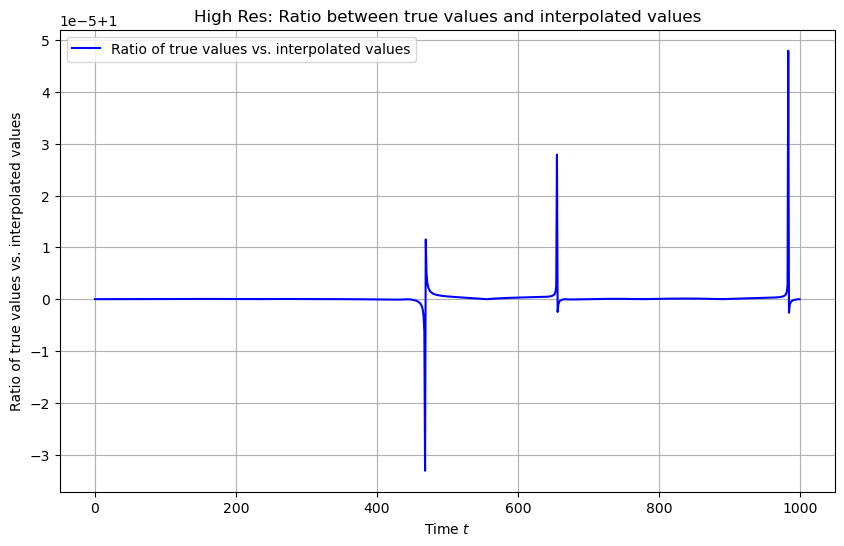

In [43]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

def get_real_and_interpolated_values(a, b, c, nr_training_t, nr_evaluated_t):
    """
    This function allows us to define on which grid we want to train the model and on which grid we want to evaluate it.

    Args:
        - a, b, c: parameters of the function f(t)
        - nr_training_t: number of points at which we train the model
        - nr_evaluated_t: number of points at which we evaluate the model

    Returns:
        - f_values: values of f(t) for the given parameters
        - f_interpolated_values: values of the interpolated function
        - t2: grid at which we evaluate the interpolated function
    """
    # We create an array of training t's between 0 and 1 (linear space)
    t = np.linspace(0, 1, nr_training_t)

    # We obtain the values of f(t) for the given parameters
    f_values = f(t, a, b, c)

    # We interpolate the values of f(t) using a linear interpolation
    f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')

    # Now evaluate f_interpolated at many more points as given by the number of evaluated t's
    t2 = np.linspace(0, 1, nr_evaluated_t)
    f_interpolated_values = f_interpolated(t2)
    f_values = f(t2, a, b, c)

    return f_values, f_interpolated_values, t2

# First, let's see what happens when we evaluate t at a much lower resolution grid than in the previous exercise.
f_values, f_interpolated_values, t = get_real_and_interpolated_values(a, b, c, 10, 10000) # We choose a training grid a factor 10 smaller than in the previous exercise (evaluation grid of 10000).
plot_against_interpolation(a, b, c, f_interpolated_values, t=t, title="Low Res: Interpolated vs. true values")
plot_ratio(f_values, f_interpolated_values, cutoff=[-10,10], title="Low Res: Ratio between true values and interpolated values (cut off at -10 and 10)")

# Now, let's see what happens when we evaluate t at a much higher resolution grid.
f_values, f_interpolated_values, t = get_real_and_interpolated_values(a, b, c, 1000, 10000) # We choose a training grid a factor 10 bigger than in the previous exercise (evaluation grid of 10000).
plot_against_interpolation(a, b, c, f_interpolated_values, t=t, title="High Res: Interpolated vs. true values")
plot_ratio(f_values, f_interpolated_values, cutoff=[-np.inf,np.inf], title="High Res: Ratio between true values and interpolated values")


**Conclusion:** We may clearly see, that evaluating the interpolated function of more points of our original function yields a much better result, compared to evaluating the interpolation on only a few points.

## Question 4
Show the ratio of the interpolated values to true values accross the fine time grid.

What do you observe? Does it make sense?

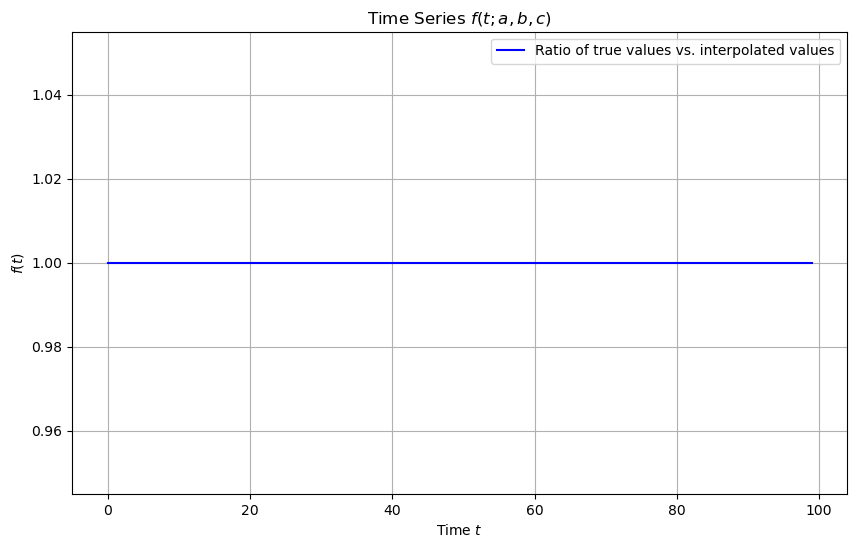

In [5]:
# Count how many f_values there are
n_values = len(f_values)
# Get the interpolated values for the same t's (but if there are more f_values, I want the interpolated values for more t's)
t_interpolated = np.linspace(0, 1, n_values)
f_interpolated_values = f_interpolated(t_interpolated)
# Calculate the ratio between the interpolated values and the real values
plot_ratio(f_values, f_interpolated_values)

*Come back to this question!!!*

## Question 5
Consider now all paramaters fixed except a and t.

We assume the parameter a can take values between 0 and 1.

Generate 10 samples of f (i.e., 10 time series) corresponding to linearly spaced values of a spanning the interval.

Store them in a pandas DataFrame and plot them with the plot method of the DataFrame.

<Axes: title={'center': 'Time Series $f(t; a, b, c)$'}, xlabel='t'>

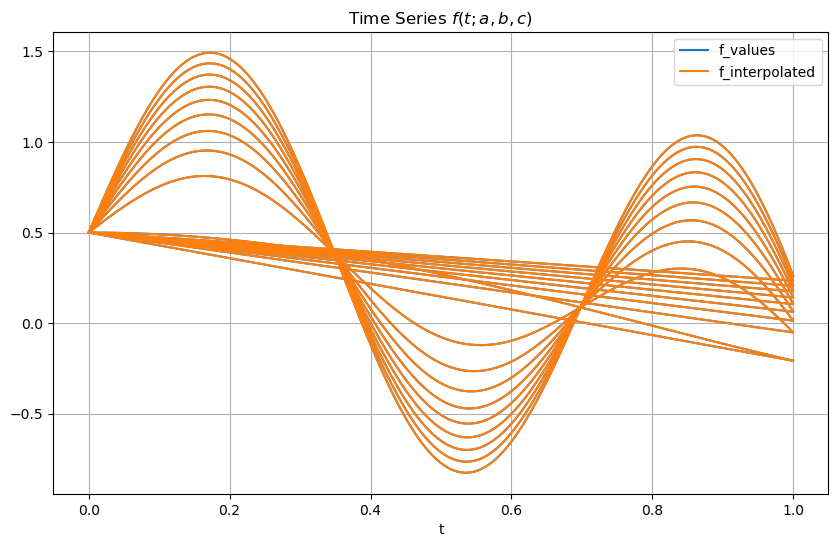

In [6]:
def interpolate_over_a(t, length_a=10):
    a = np.linspace(0, 1, length_a)
    values = pd.DataFrame({'a': [], 't': [], 'f_values': [], 'f_interpolated': []})
    # Iterate 10 times
    for i in range(length_a):
        f_values = f(t, a[i], b, c)
        f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')
        # Construct a DataFrame with the values of a, t, f_values and f_interpolated
        df = pd.DataFrame({'a': [a[i]]*len(t), 't': t, 'f_values': f_values, 'f_interpolated': f_interpolated(t)})
        # Concatenate the new DataFrame with the previous values
        values = pd.concat([values, df], ignore_index=True)
    return values

t = np.linspace(0, 1, 10000)
values = interpolate_over_a(t)

# Plot the df using the plot method of pandas
values.plot(x='t', y=['f_values', 'f_interpolated'], title='Time Series $f(t; a, b, c)$', grid=True, figsize=(10, 6))


### Conclusion
The curve looks quite different for different a, but the interpolation is always super close.

## 6 Question
Create an interpolator that interpolates over a (same range as previous question) and returns the full time series (i.e., values of f for all time points) over the original time grid, i.e., t.

Plot the result for a = 0.123, like in question 3.

Plot the ratio, like in question 4.

Shape of f_training_values: (10, 100, 1, 1)
Shape of f_evaluated_values: (100, 1000, 1, 1)
Interpolated values for a = 0.125:
t values: [0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07

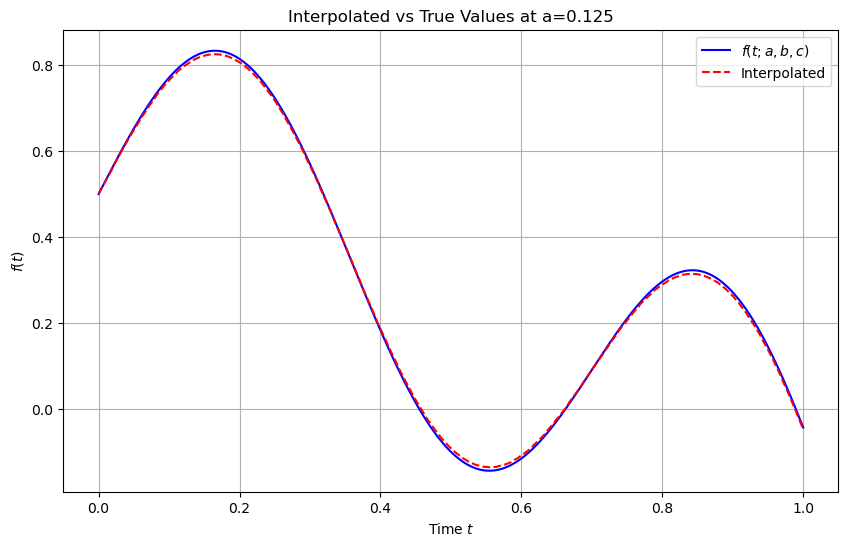

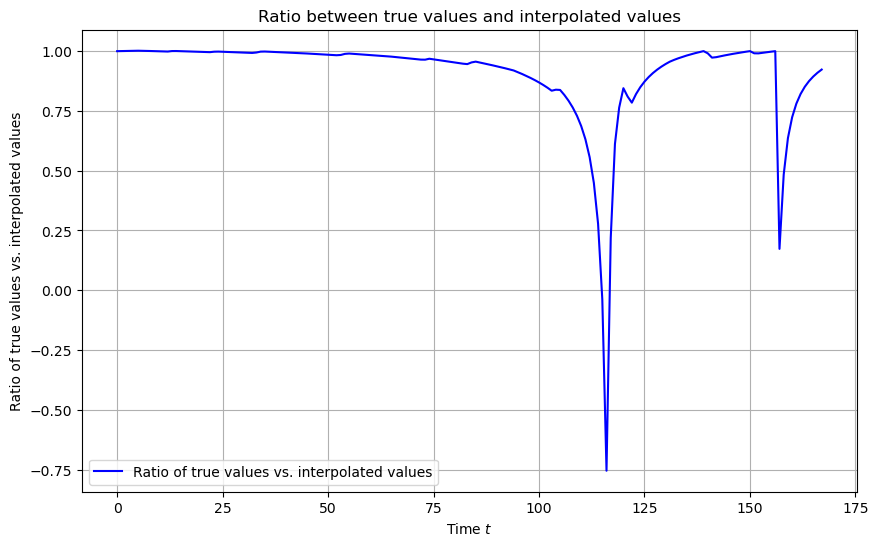

In [65]:
from scipy.interpolate import LinearNDInterpolator

def get_interpolated_values(args):
    """
    {
        "a": linespace_a,
        "t": linespace_t,
        "b": linespace_b,
        "c": linespace_c
    }
    """
    # Create meshgrid for all parameters
    grids = np.meshgrid(*args.values(), indexing="ij")

    # Create a dictionary mapping parameter names to their grids
    grid_params = {param: grid for param, grid in zip(args.keys(), grids)}

    f_values = f(
        grid_params["t"],
        grid_params["a"],
        grid_params["b"],
        grid_params["c"]
    ) 

    return f_values, grid_params
    
    

def get_interpolated_and_evaluated_values_multidim(args):
    """
    {
        "interpolated_params": ["a", "t"],
        "set_params": ["b", "c"],
        "a": {
            "min": 0,
            "max": 1,
            "nr_training": 10,
            "nr_evaluated": 100
        },
        "t": {
            "min": 0,
            "max": 1,
            "nr_training": 100,
            "nr_evaluated": 1000
        },
        "b": {
            "min": -0.13,
            "max": 0.13,
            "nr_training": 1,
            "nr_evaluated": 1
        },
        "c": {
            "min": 9,
            "max": 9,
            "nr_training": 1,
            "nr_evaluated": 1
        }
    }
    """
    # Get the training linespaces for the parameters
    training_linespaces = {}
    for param in args:
        training_linespaces[param] = np.linspace(args[param]["min"], args[param]["max"], args[param]["nr_training"])
    
    # # Get the evaluated linespaces for the parameters
    evaluated_linespaces = {}
    for param in args:
        evaluated_linespaces[param] = np.linspace(args[param]["min"], args[param]["max"], args[param]["nr_evaluated"])
    
    # Get interpolated values for the training linespaces
    f_training_values, grid_training_params = get_interpolated_values(training_linespaces)
    f_evaluated_values, grid_evaluated_params = get_interpolated_values(evaluated_linespaces)

    # Create a 2D interpolator for `a` and `t` using training values
    a_training = grid_training_params["a"].flatten()
    t_training = grid_training_params["t"].flatten()
    f_training_flat = f_training_values.flatten()
    interpolator = LinearNDInterpolator(list(zip(a_training, t_training)), f_training_flat)

    # Generate a 2D grid for `a` and `t` using evaluated linespaces
    a_eval = evaluated_linespaces["a"]
    t_eval = evaluated_linespaces["t"]
    a_grid, t_grid = np.meshgrid(a_eval, t_eval, indexing="ij")

    
    # Interpolate on the evaluated grid
    f_interpolated = interpolator(a_grid, t_grid)

    return f_interpolated, f_training_values, f_evaluated_values, (a_grid, t_grid)

    
    
args = {
        "a": {
            "min": 0,
            "max": 1,
            "nr_training": 10,
            "nr_evaluated": 100
        },
        "t": {
            "min": 0,
            "max": 1,
            "nr_training": 100,
            "nr_evaluated": 1000
        },
        "b": {
            "min": -0.13,
            "max": 0.13,
            "nr_training": 1,
            "nr_evaluated": 1
        },
        "c": {
            "min": 9,
            "max": 9,
            "nr_training": 1,
            "nr_evaluated": 1
        }
    }

f_interpolated, f_training_values, f_evaluated_values, (a_grid, t_grid) = get_interpolated_and_evaluated_values_multidim(args)
print("Shape of f_training_values:", f_training_values.shape)
print("Shape of f_evaluated_values:", f_evaluated_values.shape)
# print("Shape of f_values:", f_values.shape)

# Define the target value for a
target_a = 0.125

# Find the index in a_grid where the value is closest to target_a
a_index = np.abs(a_grid[:, 0] - target_a).argmin()

# Extract the corresponding t values and f_interpolated values
t_values_at_target_a = t_grid[a_index, :]
f_values_at_target_a = f_interpolated[a_index, :]

# Print the results
print(f"Interpolated values for a = {target_a}:")
print("t values:", t_values_at_target_a)
print("f values:", f_values_at_target_a)
plot_two_functions(f(t_values_at_target_a, target_a, b, c), f_values_at_target_a, title="Interpolated vs True Values at a=0.125")
plot_ratio(f(t_values_at_target_a, target_a, b, c), f_values_at_target_a, title="Ratio between true values and interpolated values")

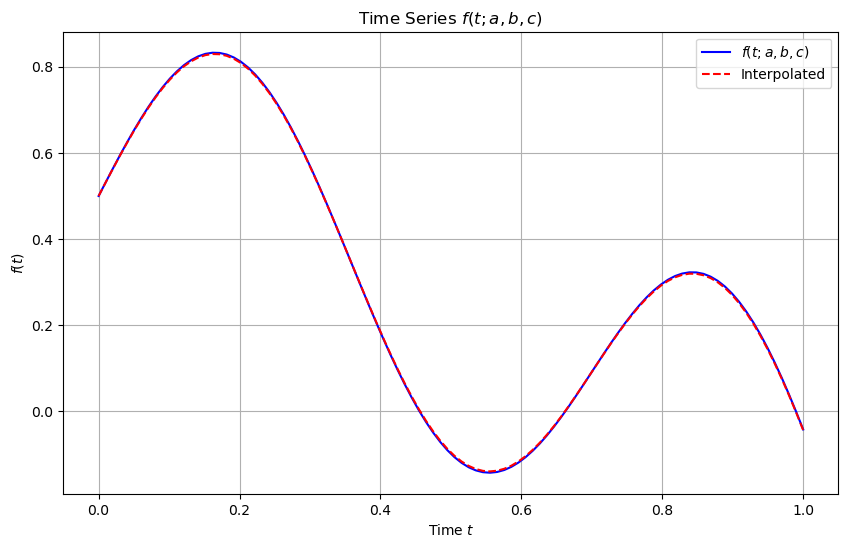

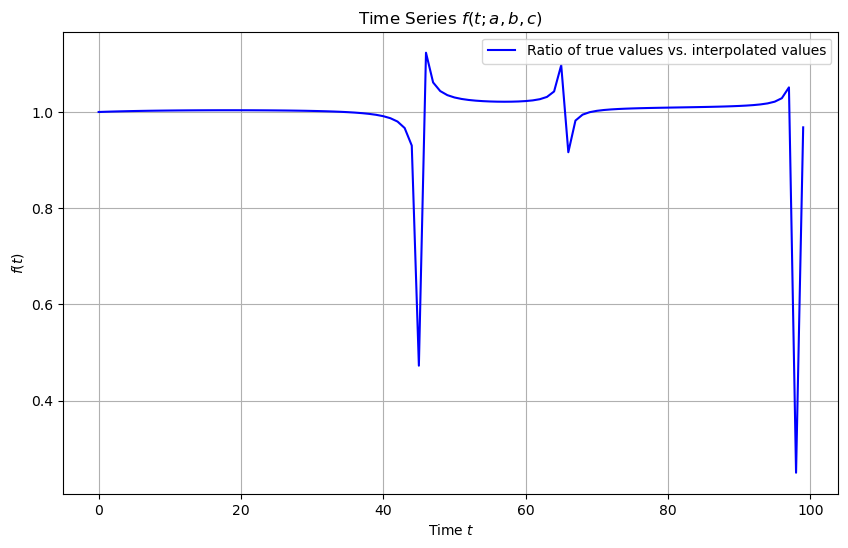

In [7]:
t = np.linspace(0, 1, 100)
a = np.linspace(0, 1, 10)
values = np.array([[f(t_val, a_val, b, c) for t_val in t] for a_val in a])

# Create the interpolator
f_interpolated = scipy.interpolate.RegularGridInterpolator((a, t), values)


def get_interpolated_values_given_a(a):
    # Obtain the points for a 
    points = np.array([[a, t_val] for t_val in t])

    # Obtain the interpolated values for a = 0.125 and all 100 t's.
    interpolated_values = f_interpolated(points)

    return interpolated_values

# Get the interpolated values for a = 0.125
a_fixed = 0.125
interpolated_values = get_interpolated_values_given_a(a_fixed)

# Plot the values of f(t) and the interpolated function
plot_against_interpolation(a_fixed, b, c, interpolated_values, t)

# Obtain the right true values
f_values = np.array([f(t_val, a_fixed, b, c) for t_val in t])
plot_ratio(f_values, interpolated_values)


**Conclusion:** For two dimensions, the fit is still pretty good.

## Question 7
Use widgets from ipywidgets to create a sliding scale of a values.

In this question, you should plot the ratio between the interpolated values and the true values of the function evaluated at the original time grid t.


In [8]:
# Create the interactive widget
def plot_interpolated_values(a):
    interpolated_values = get_interpolated_values_given_a(a)
    plot_against_interpolation(a, b, c, interpolated_values, t)
    f_values = np.array([f(t_val, a, b, c) for t_val in t])
    plot_ratio(f_values, interpolated_values)

# Create the interactive widget
interactive_plot = interactive(
    plot_interpolated_values,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1)
)

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), Output()), _dom_classes=('w…

**Conclusion:** For some a, the interpolation is very good, while for some it is very bad. E.g., for a = 0.03 it's pretty bad, but it is quite good for e.g. a = 0.83, and perfect for a = 1. Evidently, the goodness of fit seems to increase in a.

## Question 8
*From your results of Question 7, what do you observe? Does it make sense?*

We observe, that at a=1, the interpolation is perfect. This makes sense when we examine our function:

$$
f(t, a, b, c) = \sqrt{a} \cdot e^{-b \cdot t} \cdot \sin(c \cdot t) + 0.5 \cdot \cos(2 \cdot t)
$$

The higher our alpha becomes, the better behaved is our function. Therefore, the interpolation is better for higher a.

## Question 9
We will now consider both a and b as interpolation parameters.

Our interpolator should therefore interpolate accross both a and b ranges.

Generate $10^2$ parameter value pairs $(a,b)$ in the range $ 0 < a < 1$ and $-0.5 < b < 0.5$ using latin hyper cube sampling.

Show the a and b samples as a 2D scatter plot.

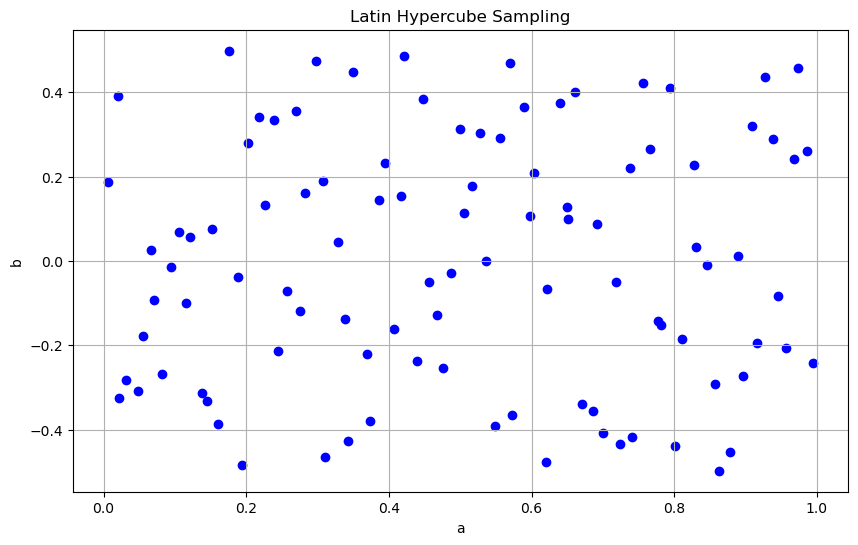

In [79]:
# Create a Latin Hypercube sampler instance
sampler = scipy.stats.qmc.LatinHypercube(d=2)

# Generate 100 random samples
sample = sampler.random(100)

# Define the lower and upper bounds for the parameters
lower_bounds = [0, -0.5]
upper_bounds = [1, 0.5]

# Scale the samples to the desired range
sample_scaled = scipy.stats.qmc.scale(sample, lower_bounds, upper_bounds)

# Show the a and b samples as a 2D scatter plot.
def scatter_plot(sample_scaled, title="Latin Hypercube Sampling"):
    plt.figure(figsize=(10, 6))
    plt.scatter(sample_scaled[:, 0], sample_scaled[:, 1], color='blue')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(title)
    plt.grid(True)
    plt.show()

scatter_plot(sample_scaled)

## Question 10

For comparison, on the same plot, add a uniformly sampled realization of $10^2$ $a$ and $b$ values.

Can you distinguish by eye?

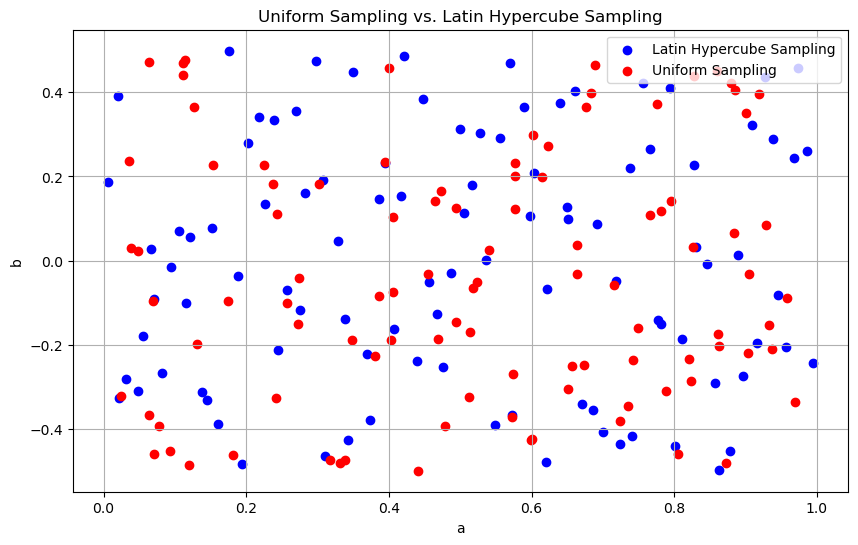

In [80]:
# Sample 100 a values using a uniform distribution
a = np.random.uniform(0, 1, 100)
b = np.random.uniform(-0.5, 0.5, 100)

# Create the combinations (a, b) for the uninformed samples (matching i = 1 in a to i = 1 in b)
uninformed_samples = np.array([[a[i], b[i]] for i in range(len(a))])

title="Uniform Sampling vs. Latin Hypercube Sampling"
plt.figure(figsize=(10, 6))
plt.scatter(sample_scaled[:, 0], sample_scaled[:, 1], color='blue')
plt.scatter(uninformed_samples[:, 0], uninformed_samples[:, 1], color='red')
plt.xlabel('a')
plt.ylabel('b')
plt.title(title)
plt.legend(['Latin Hypercube Sampling', 'Uniform Sampling'])
plt.grid(True)
plt.show()


**Conclusion:** I can't really see a difference...

## Question 11
Create the interpolator over the parameter space $(a,b)$ interpolating over samples of the function evaluated at the original time grid $t$.

As you will realise, we are dealing with an irregular grid and need the `griddata` method.

In [88]:
parameter_space = sample_scaled.copy() # Data obtained from Latin Hypercube Sampling
print(parameter_space)

def convert_parameter_space(parameter_space):
    t_values = np.linspace(0, 1, len(parameter_space))
    return [(a, b, t) for (a, b), t in zip(parameter_space, t_values)]

conv_parameter_space = convert_parameter_space(parameter_space)

# Fixed value of c
c_fixed = 0.9

t = np.linspace(0, 1, len(parameter_space))
# Calculate f(t, a, b, c_fixed) for each point in parameter_space
f_vals = [f(t, a, b, c=c_fixed) for a, b, t in conv_parameter_space]

def interpolate_at_points(parameter_space):
    # Extract a, b, t values from parameter_space
    a_vals, b_vals, t_vals = zip(*parameter_space)
    
    # Perform interpolation using only the points in parameter_space
    interpolated_values = scipy.interpolate.griddata(
        points=(a_vals, b_vals, t_vals),
        values=f_vals,
        xi=parameter_space,
        method='linear'
    )
    
    return interpolated_values

interpolated_values = interpolate_at_points(conv_parameter_space)
print(interpolated_values)




[[ 9.57291650e-01 -2.05443899e-01]
 [ 9.41036135e-02 -1.46152588e-02]
 [ 9.45014247e-01 -8.23964812e-02]
 [ 3.42659497e-01 -4.26916852e-01]
 [ 4.77200932e-02 -3.09329077e-01]
 [ 2.26414614e-01  1.33384319e-01]
 [ 8.62573045e-01 -4.97687325e-01]
 [ 1.21585938e-01  5.63744139e-02]
 [ 9.73868496e-01  4.57418776e-01]
 [ 7.00582867e-01 -4.07323656e-01]
 [ 2.74814827e-01 -1.17888471e-01]
 [ 7.23842694e-01 -4.34951935e-01]
 [ 3.73400316e-01 -3.78589501e-01]
 [ 6.65355872e-02  2.69256828e-02]
 [ 8.28455897e-01  2.28178291e-01]
 [ 3.07693617e-01  1.90526835e-01]
 [ 6.70394260e-01 -3.40024001e-01]
 [ 1.76370319e-01  4.98670045e-01]
 [ 6.19681359e-01 -4.77499967e-01]
 [ 8.56703913e-01 -2.90936390e-01]
 [ 7.56027828e-01  4.22288892e-01]
 [ 2.38507225e-01  3.34130472e-01]
 [ 4.17623977e-01  1.53529743e-01]
 [ 8.10869031e-01 -1.86229595e-01]
 [ 5.57650171e-02 -1.78757521e-01]
 [ 8.30479335e-01  3.31494806e-02]
 [ 9.27157810e-01  4.35353962e-01]
 [ 9.39046024e-01  2.89198881e-01]
 [ 5.27199034e-01  3

TypeError: 'numpy.ndarray' object is not callable

## Exercise 13
Compare memory and time of (i) the original function call and (ii) the interpolator call.

{'Original Function (Func A)': {'Average Time (s)': 0.0001845534169988241, 'Memory Usage (bytes)': 0.00021620799088850617}, 'Interpolator Function (Func B)': {'Average Time (s)': 6.180008299998008e-05, 'Memory Usage (bytes)': 0.00010395899880677462}}


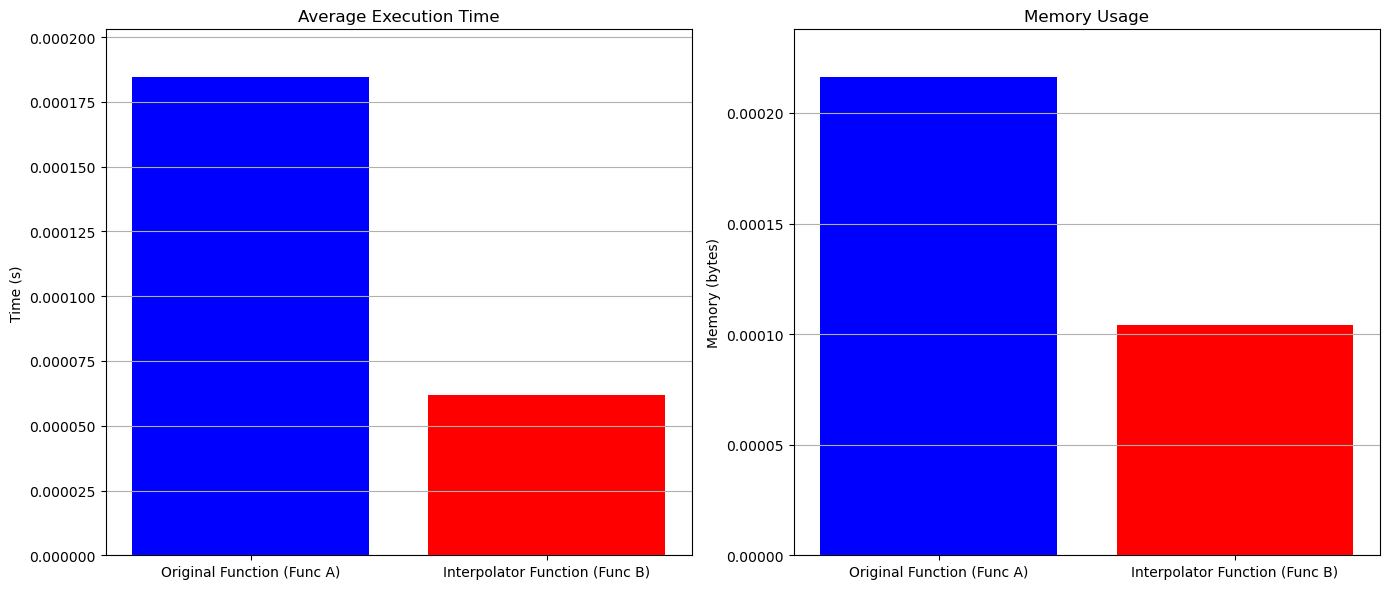

In [98]:
import timeit
import tracemalloc
import numpy as np

def compare_functions(func_a, func_b, *args, n_trials=1000):
    """
    Compares the execution time and memory usage of two functions.

    Parameters:
    - func_a: First function to compare.
    - func_b: Second function to compare.
    - *args: Arguments to be passed to both functions.
    - n_trials: Number of times to execute the functions for timing (default=1000).

    Returns:
    - A dictionary with time and memory stats for both functions.
    """
    def measure_time_and_memory(func, *args):
        # Measure memory usage
        tracemalloc.start()
        start_snapshot = tracemalloc.take_snapshot()
        
        # Measure execution time
        time_start = timeit.default_timer()
        func(*args)
        time_end = timeit.default_timer()
        
        # Capture memory usage
        end_snapshot = tracemalloc.take_snapshot()
        tracemalloc.stop()

        # Calculate memory difference
        memory_stats = end_snapshot.compare_to(start_snapshot, 'lineno')
        total_memory = sum(stat.size_diff for stat in memory_stats)

        return time_end - time_start, total_memory

    # Measure function A
    time_a = timeit.timeit(lambda: func_a(*args), number=n_trials) / n_trials
    memory_a, _ = measure_time_and_memory(func_a, *args)
    
    # Measure function B
    time_b = timeit.timeit(lambda: func_b(*args), number=n_trials) / n_trials
    memory_b, _ = measure_time_and_memory(func_b, *args)
    
    # Compile results
    results = {
        'Original Function (Func A)': {
            'Average Time (s)': time_a,
            'Memory Usage (bytes)': memory_a,
        },
        'Interpolator Function (Func B)': {
            'Average Time (s)': time_b,
            'Memory Usage (bytes)': memory_b,
        }
    }
    
    return results


# Example usage
def function_a(t):
    return f(t, 0.5, -0.13, 9)

def function_b(x):
    return f_interpolated(t)

# We create an array of training t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 10000)

results = compare_functions(function_a, function_b, t, n_trials=1000)
print(results)

# Make a bar chart to show the results of the comparison
def plot_comparison(results):
    # Extract the function names and their stats
    function_names = list(results.keys())
    time_stats = [results[name]['Average Time (s)'] for name in function_names]
    memory_stats = [results[name]['Memory Usage (bytes)'] for name in function_names]

    # Create a bar chart
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].bar(function_names, time_stats, color=['blue', 'red'])
    ax[0].set_title('Average Execution Time')
    ax[0].set_ylabel('Time (s)')
    ax[0].set_ylim(0, max(time_stats) * 1.1)
    ax[0].grid(axis='y')

    ax[1].bar(function_names, memory_stats, color=['blue', 'red'])
    ax[1].set_title('Memory Usage')
    ax[1].set_ylabel('Memory (bytes)')
    ax[1].set_ylim(0, max(memory_stats) * 1.1)
    ax[1].grid(axis='y')

    plt.tight_layout()
    plt.show()

plot_comparison(results)
